# Модуль 3. Практическое задание 3

In [2]:
import pandas as pd
import numpy as np

In [3]:
titanic = pd.read_csv(r'D:\ДПО\data\train.csv')
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.shape

(891, 12)

In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Процент выживаемости у каждого класса пассажиров

In [9]:
survival_chance = titanic.groupby('Pclass')['Survived'].value_counts(normalize = True).mul(100).round(2)
print('Процент выживаемости пассажиров по классам: \n', survival_chance) # \n перенос на другую строку

Процент выживаемости пассажиров по классам: 
 Pclass  Survived
1       1           62.96
        0           37.04
2       0           52.72
        1           47.28
3       0           75.76
        1           24.24
Name: proportion, dtype: float64


Максимальный процент выживаемости пассажиров (62.96%) наблюдался у пассажиров класса 1. Процент выживаемости пассажиров классов 2 и 3 был сравнительно ниже и составлял 47,28% и 24,24% соответственно

#### Самое популярное мужское имя на корабле

In [12]:
men = titanic.query("Sex == 'male'").copy()
men.sample(10, random_state = 12)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
676,677,0,3,"Sawyer, Mr. Frederick Charles",male,24.5,0,0,342826,8.0500,NaN,S
614,615,0,3,"Brocklebank, Mr. William Alfred",male,35.0,0,0,364512,8.0500,NaN,S
354,355,0,3,"Yousif, Mr. Wazli",male,NaN,0,0,2647,7.2250,NaN,C
800,801,0,2,"Ponesell, Mr. Martin",male,34.0,0,0,250647,13.0000,NaN,S
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S
340,341,1,2,"Navratil, Master. Edmond Roger",male,2.0,1,1,230080,26.0000,F2,S
734,735,0,2,"Troupiansky, Mr. Moses Aaron",male,23.0,0,0,233639,13.0000,NaN,S
370,371,1,1,"Harder, Mr. George Achilles",male,25.0,1,0,11765,55.4417,E50,C
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
625,626,0,1,"Sutton, Mr. Frederick",male,61.0,0,0,36963,32.3208,D50,S


С помощью regex распарсим строки с мужскими именами. Заметим, что имя мужчин содержится после Mr. или Master. 

In [14]:
men['First_Name_men'] = men['Name'].str.extract(r'\b(?:Mr|Master)\. (\w+)')
popular_male_name = men['First_Name_men'].mode()[0]
print(f'Самое популярное мужское имя: {popular_male_name}')

Самое популярное мужское имя: William


#### Самое популярное женское имя на корабле

In [16]:
women = titanic.query("Sex == 'female'").copy()
women.sample(10, random_state = 12)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
437,438,1,2,"Richards, Mrs. Sidney (Emily Hocking)",female,24.0,2,3,29106,18.7500,NaN,S
415,416,0,3,"Meek, Mrs. Thomas (Annie Louise Rowley)",female,NaN,0,0,343095,8.0500,NaN,S
381,382,1,3,"Nakid, Miss. Maria (""Mary"")",female,1.0,0,2,2653,15.7417,NaN,C
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,NaN,1,0,17453,89.1042,C92,C
440,441,1,2,"Hart, Mrs. Benjamin (Esther Ada Bloomfield)",female,45.0,1,1,F.C.C. 13529,26.2500,NaN,S
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
309,310,1,1,"Francatelli, Miss. Laura Mabel",female,30.0,0,0,PC 17485,56.9292,E36,C
216,217,1,3,"Honkanen, Miss. Eliina",female,27.0,0,0,STON/O2. 3101283,7.9250,NaN,S
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.0,1,2,SC/Paris 2123,41.5792,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C


С помощью regex распарсим строки с женскими именами. Заметим, что, в отличии от мужских имен, женские имена содержатся первым словом в () 

In [18]:
women['First_Name_women'] = women['Name'].str.extract(r'\(([^)]+)\)')
women['First_Name_women'] = women['First_Name_women'].str.split().str[0]
popular_female_name = women['First_Name_women'].mode()
print(f'Самое популярное женское имя:\n{popular_female_name}')

Самое популярное женское имя:
0         Anna
1    Elizabeth
Name: First_Name_women, dtype: object


#### Самое популярное мужское и женское имя на корабле по каждому классу

In [20]:
men_name = men.groupby('Pclass')['First_Name_men'].apply(lambda x: x.value_counts().idxmax())
for n, name in men_name.items():
    print(f'Самое популярное мужское имя в классе {n}: {name}')

Самое популярное мужское имя в классе 1: William
Самое популярное мужское имя в классе 2: William
Самое популярное мужское имя в классе 3: William


In [21]:
women_name = women.groupby('Pclass')['First_Name_women'].apply(lambda x: x.value_counts().idxmax())
for n, name in women_name.items():
    print(f'Самое популярное женское имя в классе {n}: {name}')

Самое популярное женское имя в классе 1: Edith
Самое популярное женское имя в классе 2: Elizabeth
Самое популярное женское имя в классе 3: Catherine


#### Фильтр данных по заданным условиям


In [23]:
#Выведем часть таблицы с пассажирами, возраст которых больше 44 лет
titanic.query('Age > 44.0')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
...,...,...,...,...,...,...,...,...,...,...,...,...
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S
862,863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.9292,D17,S
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
873,874,0,3,"Vander Cruyssen, Mr. Victor",male,47.0,0,0,345765,9.0000,NaN,S


In [24]:
# Выведем часть таблицы с пассажирами, возраст которых меньше 44 лет и которые мужского пола
titanic.query("Age < 44.0 & Sex == 'male'")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.050,NaN,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.075,NaN,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.050,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.275,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.500,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.050,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.000,C148,C


#### Количество n-местных кабин, в которых было более 1, 2, 3, 4... человека

In [26]:
#Удалим строки с пропущенными значениями по столбцу Cabin
cabins = titanic.dropna(subset = ['Cabin']).copy()
cabins.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [27]:
cabin_counts = cabins.groupby('Cabin').size()
result = cabin_counts.value_counts()

for n, count in result.items():
    print(f'Количество кают с {n} пассажирами: {count}')

Количество кают с 1 пассажирами: 101
Количество кают с 2 пассажирами: 38
Количество кают с 3 пассажирами: 5
Количество кают с 4 пассажирами: 3


Для удобства восприятия полученных результатов, отобразим их в виде столбчатой диаграммы

<Axes: title={'center': 'Распределение кают по числу пассажиров'}, xlabel='Количество пассажиров в каюте', ylabel='Количество кают'>

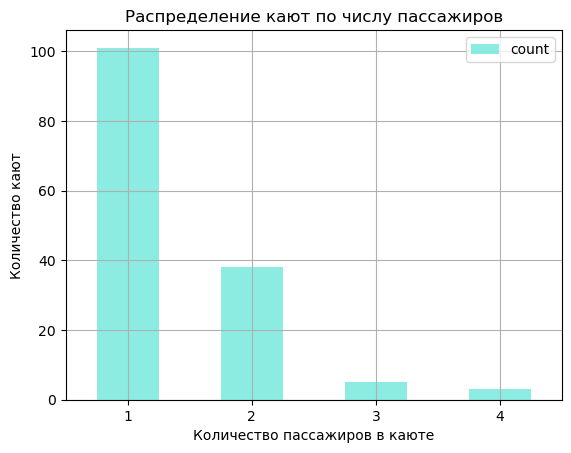

In [29]:
result.plot(
    kind='bar',
    rot=0,
    color = 'turquoise',
    alpha = 0.6,
    title='Распределение кают по числу пассажиров',
    xlabel='Количество пассажиров в каюте',
    ylabel='Количество кают',
    legend=True,
    grid=True
)